In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR 
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'seq_patterns/testes/historical_rules_commit10_197reg_021.xlsx', keep_default_na=False)
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
df2 = df.copy()
len(df)
#df.head()
df2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Snowflake'}),frozenset({'Amazon Redshift'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
1,frozenset({'Amazon Redshift'}),frozenset({'Snowflake'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
2,frozenset({'Google BigQuery'}),frozenset({'Snowflake'}),0.045685,0.030457,0.025381,0.555556,18.240741,0.023989,2.181472,1,1
3,frozenset({'Snowflake'}),frozenset({'Google BigQuery'}),0.030457,0.045685,0.025381,0.833333,18.240741,0.023989,5.725888,1,1
4,frozenset({'Informix'}),frozenset({'Firebird'}),0.045685,0.040609,0.030457,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...
409,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL'}),0.071066,0.441624,0.040609,0.571429,1.293924,0.009225,1.302876,1,1
410,frozenset({'SQLite'}),frozenset({'MongoDB'}),0.137056,0.152284,0.025381,0.185185,1.216049,0.004509,1.040378,1,1
411,frozenset({'MongoDB'}),frozenset({'SQLite'}),0.152284,0.137056,0.025381,0.166667,1.216049,0.004509,1.035533,1,1
412,frozenset({'Cassandra'}),frozenset({'H2'}),0.071066,0.299492,0.025381,0.357143,1.192494,0.004097,1.089679,1,1


In [16]:
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [ ]:
df['antecedents'] = df['antecedents'].str.removeprefix("frozenset({")
#df['antecedents'] = df['antecedents'].str.removesuffix("})")
df
#df['consequents'] = df['consequents'].str.removeprefix("frozenset({")
#df['consequents'] = df['consequents'].str.removesuffix("})")

In [15]:
#df.replace({'frozenset': ''}, regex=True, inplace=True)
#df.replace({'frozenset({':''}, regex=True, inplace=True)
df.replace({"({":''}, regex=False, inplace=True)
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Snowflake'}),frozenset({'Amazon Redshift'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
1,frozenset({'Amazon Redshift'}),frozenset({'Snowflake'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
2,frozenset({'Google BigQuery'}),frozenset({'Snowflake'}),0.045685,0.030457,0.025381,0.555556,18.240741,0.023989,2.181472,1,1
3,frozenset({'Snowflake'}),frozenset({'Google BigQuery'}),0.030457,0.045685,0.025381,0.833333,18.240741,0.023989,5.725888,1,1
4,frozenset({'Informix'}),frozenset({'Firebird'}),0.045685,0.040609,0.030457,0.666667,16.416667,0.028602,2.878173,1,1
...,...,...,...,...,...,...,...,...,...,...,...
409,frozenset({'Google Cloud Datastore'}),frozenset({'MySQL'}),0.071066,0.441624,0.040609,0.571429,1.293924,0.009225,1.302876,1,1
410,frozenset({'SQLite'}),frozenset({'MongoDB'}),0.137056,0.152284,0.025381,0.185185,1.216049,0.004509,1.040378,1,1
411,frozenset({'MongoDB'}),frozenset({'SQLite'}),0.152284,0.137056,0.025381,0.166667,1.216049,0.004509,1.035533,1,1
412,frozenset({'Cassandra'}),frozenset({'H2'}),0.071066,0.299492,0.025381,0.357143,1.192494,0.004097,1.089679,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [ ]:
rules1b = df2.sort_values(['support',], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
298,frozenset({'PostgreSQL'}),frozenset({'MySQL'}),0.309645,0.441624,0.263959,0.852459,1.930281,0.127213,3.784546,1,1
299,frozenset({'MySQL'}),frozenset({'PostgreSQL'}),0.441624,0.309645,0.263959,0.597701,1.930281,0.127213,1.716026,1,1
353,frozenset({'H2'}),frozenset({'MySQL'}),0.299492,0.441624,0.218274,0.728814,1.650302,0.086011,2.059010,1,1
352,frozenset({'MySQL'}),frozenset({'H2'}),0.441624,0.299492,0.218274,0.494253,1.650302,0.086011,1.385095,1,1
369,frozenset({'MySQL'}),frozenset({'Redis'}),0.441624,0.263959,0.182741,0.413793,1.567639,0.066170,1.255599,1,1
...,...,...,...,...,...,...,...,...,...,...,...
182,frozenset({'PostGIS'}),frozenset({'H2'}),0.030457,0.299492,0.025381,0.833333,2.782486,0.016259,4.203046,1,1
183,frozenset({'H2'}),frozenset({'PostGIS'}),0.299492,0.030457,0.025381,0.084746,2.782486,0.016259,1.059316,1,1
184,frozenset({'H2'}),frozenset({'MS Access'}),0.299492,0.030457,0.025381,0.084746,2.782486,0.016259,1.059316,1,1
185,frozenset({'H2'}),frozenset({'Amazon Redshift'}),0.299492,0.030457,0.025381,0.084746,2.782486,0.016259,1.059316,1,1


In [ ]:
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,
frozenset({'MySQL'}),0.441624,0.108774,0.085932,0.194581,1.909593,0.037894,1.131064,1,1
frozenset({'PostgreSQL'}),0.309645,0.113488,0.078136,0.252342,2.523888,0.042995,1.295733,1,1
frozenset({'H2'}),0.299492,0.118899,0.066966,0.223598,2.140782,0.031357,1.184453,1,1
frozenset({'Redis'}),0.263959,0.147742,0.069463,0.263158,1.920918,0.030465,1.197324,1,1
frozenset({'Oracle'}),0.253807,0.119485,0.063061,0.248462,2.515317,0.032735,1.233606,1,1
frozenset({'Ehcache'}),0.218274,0.172272,0.064404,0.295058,1.768168,0.026801,1.218461,1,1
frozenset({'MariaDB'}),0.182741,0.138023,0.062364,0.341270,3.228804,0.037142,1.568395,1,1
frozenset({'MS SQL Server'}),0.157360,0.127750,0.059222,0.376344,3.858823,0.039119,2.020680,1,1
frozenset({'MongoDB'}),0.152284,0.163847,0.053017,0.348148,2.563110,0.028066,1.324415,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [5]:
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,
frozenset({'MySQL'}),0.108774,0.441624,0.085932,0.843323,1.909593,0.037894,inf,1,1
frozenset({'PostgreSQL'}),0.113488,0.309645,0.078136,0.781508,2.523888,0.042995,inf,1,1
frozenset({'H2'}),0.118899,0.299492,0.066966,0.641148,2.140782,0.031357,inf,1,1
frozenset({'Redis'}),0.147742,0.263959,0.069463,0.507044,1.920918,0.030465,1.686226,1,1
frozenset({'Oracle'}),0.119485,0.253807,0.063061,0.638405,2.515317,0.032735,inf,1,1
frozenset({'Ehcache'}),0.172272,0.218274,0.064404,0.385945,1.768168,0.026801,1.281182,1,1
frozenset({'MariaDB'}),0.138023,0.182741,0.062364,0.590035,3.228804,0.037142,inf,1,1
frozenset({'MS SQL Server'}),0.127750,0.157360,0.059222,0.607226,3.858823,0.039119,inf,1,1
frozenset({'MongoDB'}),0.163847,0.152284,0.053017,0.390321,2.563110,0.028066,1.512583,1,1


In [ ]:
correlation = rules1a.corr(rules1)
correlation

/home/raquelmax/.local/share/virtualenvs/db-mining-pBhgzAM8/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

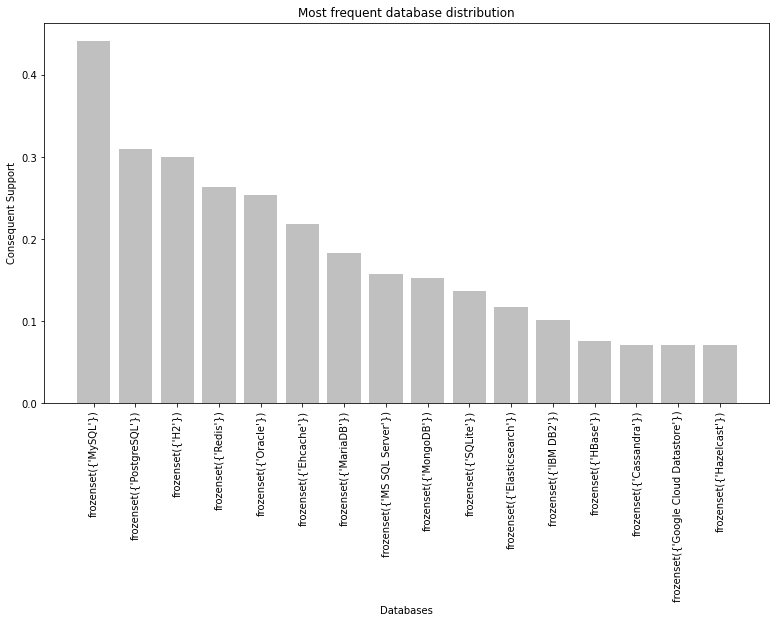

In [ ]:
plt.figure(figsize=(13,7))
#plt.colorbar(orientation='horizontal')
plt.bar(rules1.index , rules1['consequent support'], color = 'silver')
plt.title('Most frequent database distribution')
plt.xlabel("Databases")
plt.xticks(rotation=90)
plt.ylabel("Consequent Support")
plt.show() 

In [6]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

rules1c = rules1c[(rules1c['support'] >= 0.08)] 
rules1c

antecedent support  \
antecedents               consequents                                     
frozenset({'PostgreSQL'}) frozenset({'MySQL'})                 0.309645   
frozenset({'MySQL'})      frozenset({'PostgreSQL'})            0.441624   
                          frozenset({'H2'})                    0.441624   
frozenset({'H2'})         frozenset({'MySQL'})                 0.299492   
frozenset({'MySQL'})      frozenset({'Redis'})                 0.441624   
...                                                                 ...   
frozenset({'Redis'})      frozenset({'MariaDB'})               0.263959   
frozenset({'MongoDB'})    frozenset({'PostgreSQL'})            0.152284   
frozenset({'PostgreSQL'}) frozenset({'SQLite'})                0.309645   
frozenset({'SQLite'})     frozenset({'PostgreSQL'})            0.137056   
frozenset({'PostgreSQL'}) frozenset({'MongoDB'})               0.309645   

                                                     consequent support  \
antecedents               consequents                                     
frozenset({'PostgreSQL'}) frozenset({'MySQL'})                 0.441624   
frozenset({'MySQL'})      frozenset({'PostgreSQL'})            0.309645   
                          frozenset({'H2'})                    0.299492   
frozenset({'H2'})         frozenset({'MySQL'})                 0.441624   
frozenset({'MySQL'})      frozenset({'Redis'})                 0.263959   
...                                                                 ...   
frozenset({'Redis'})      frozenset({'MariaDB'})               0.182741   
frozenset({'MongoDB'})    frozenset({'PostgreSQL'})            0.309645   
frozenset({'PostgreSQL'}) frozenset({'SQLite'})                0.137056   
frozenset({'SQLite'})     frozenset({'PostgreSQL'})            0.309645   
frozenset({'PostgreSQL'}) frozenset({'MongoDB'})               0.152284   

                                                      support  confidence  \
antecedents               consequents                                       
frozenset({'PostgreSQL'}) frozenset({'MySQL'})       0.263959    0.852459   
frozenset({'MySQL'})      frozenset({'PostgreSQL'})  0.263959    0.597701   
                          frozenset({'H2'})          0.218274    0.494253   
frozenset({'H2'})         frozenset({'MySQL'})       0.218274    0.728814   
frozenset({'MySQL'})      frozenset({'Redis'})       0.182741    0.413793   
...                                                       ...         ...   
frozenset({'Redis'})      frozenset({'MariaDB'})     0.086294    0.326923   
frozenset({'MongoDB'})    frozenset({'PostgreSQL'})  0.081218    0.533333   
frozenset({'PostgreSQL'}) frozenset({'SQLite'})      0.081218    0.262295   
frozenset({'SQLite'})     frozenset({'PostgreSQL'})  0.081218    0.592593   
frozenset({'PostgreSQL'}) frozenset({'MongoDB'})     0.081218    0.262295   

                                                         lift  leverage  \
antecedents               consequents                                     
frozenset({'PostgreSQL'}) frozenset({'MySQL'})       1.930281  0.127213   
frozenset({'MySQL'})      frozenset({'PostgreSQL'})  1.930281  0.127213   
                          frozenset({'H2'})          1.650302  0.086011   
frozenset({'H2'})         frozenset({'MySQL'})       1.650302  0.086011   
frozenset({'MySQL'})      frozenset({'Redis'})       1.567639  0.066170   
...                                                       ...       ...   
frozenset({'Redis'})      frozenset({'MariaDB'})     1.788996  0.038058   
frozenset({'MongoDB'})    frozenset({'PostgreSQL'})  1.722404  0.034064   
frozenset({'PostgreSQL'}) frozenset({'SQLite'})      1.913783  0.038780   
frozenset({'SQLite'})     frozenset({'PostgreSQL'})  1.913783  0.038780   
frozenset({'PostgreSQL'}) frozenset({'MongoDB'})     1.722404  0.034064   

                                                     conviction  \
antecedents               consequents                   

In [7]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'PostgreSQL'}),frozenset({'MySQL'}),0.309645,0.441624,0.263959,0.852459,1.930281,0.127213,3.784546,1,1
1,frozenset({'MySQL'}),frozenset({'PostgreSQL'}),0.441624,0.309645,0.263959,0.597701,1.930281,0.127213,1.716026,1,1
2,frozenset({'MySQL'}),frozenset({'H2'}),0.441624,0.299492,0.218274,0.494253,1.650302,0.086011,1.385095,1,1
3,frozenset({'H2'}),frozenset({'MySQL'}),0.299492,0.441624,0.218274,0.728814,1.650302,0.086011,2.059010,1,1
4,frozenset({'MySQL'}),frozenset({'Redis'}),0.441624,0.263959,0.182741,0.413793,1.567639,0.066170,1.255599,1,1
...,...,...,...,...,...,...,...,...,...,...,...
65,frozenset({'Redis'}),frozenset({'MariaDB'}),0.263959,0.182741,0.086294,0.326923,1.788996,0.038058,1.214213,1,1
66,frozenset({'MongoDB'}),frozenset({'PostgreSQL'}),0.152284,0.309645,0.081218,0.533333,1.722404,0.034064,1.479333,1,1
67,frozenset({'PostgreSQL'}),frozenset({'SQLite'}),0.309645,0.137056,0.081218,0.262295,1.913783,0.038780,1.169769,1,1
68,frozenset({'SQLite'}),frozenset({'PostgreSQL'}),0.137056,0.309645,0.081218,0.592593,1.913783,0.038780,1.694509,1,1


In [8]:
import plotly.express as px 
fig = px.scatter(rules1c.sort_values(['support'], ascending=[False]), x="consequents", y="antecedents", 
size='support',  color="support", title='Correlation of the most frequent databases',
hover_data=['support']) 
#fig.title('Correlation of the most frequent databases')
fig.show()

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [ ]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
228,frozenset({'SapHana'}),frozenset({'MySQL'}),0.025381,0.441624,0.025381,1.000000,2.264368,0.014172,inf,1,1
231,frozenset({'Informix'}),frozenset({'MySQL'}),0.045685,0.441624,0.045685,1.000000,2.264368,0.025510,inf,1,1
232,frozenset({'Firebird'}),frozenset({'MySQL'}),0.040609,0.441624,0.040609,1.000000,2.264368,0.022675,inf,1,1
234,frozenset({'MS Access'}),frozenset({'MySQL'}),0.030457,0.441624,0.030457,1.000000,2.264368,0.017006,inf,1,1
236,frozenset({'ClickHouse'}),frozenset({'MySQL'}),0.035533,0.441624,0.035533,1.000000,2.264368,0.019841,inf,1,1
238,frozenset({'SAP Adaptive Server'}),frozenset({'MySQL'}),0.060914,0.441624,0.060914,1.000000,2.264368,0.034013,inf,1,1
240,frozenset({'Amazon Redshift'}),frozenset({'MySQL'}),0.030457,0.441624,0.030457,1.000000,2.264368,0.017006,inf,1,1
242,frozenset({'Snowflake'}),frozenset({'MySQL'}),0.030457,0.441624,0.030457,1.000000,2.264368,0.017006,inf,1,1
244,frozenset({'IBM DB2'}),frozenset({'MySQL'}),0.101523,0.441624,0.101523,1.000000,2.264368,0.056688,inf,1,1
269,frozenset({'MS SQL Server'}),frozenset({'MySQL'}),0.157360,0.441624,0.147208,0.935484,2.118280,0.077714,8.654822,1,1


In [ ]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
144,frozenset({'Informix'}),frozenset({'PostgreSQL'}),0.045685,0.309645,0.045685,1.000000,3.229508,0.031539,inf,1,1
145,frozenset({'PostgreSQL'}),frozenset({'Snowflake'}),0.309645,0.030457,0.030457,0.098361,3.229508,0.021026,1.075311,1,1
146,frozenset({'PostgreSQL'}),frozenset({'Amazon Redshift'}),0.309645,0.030457,0.030457,0.098361,3.229508,0.021026,1.075311,1,1
147,frozenset({'Amazon Redshift'}),frozenset({'PostgreSQL'}),0.030457,0.309645,0.030457,1.000000,3.229508,0.021026,inf,1,1
148,frozenset({'Snowflake'}),frozenset({'PostgreSQL'}),0.030457,0.309645,0.030457,1.000000,3.229508,0.021026,inf,1,1
149,frozenset({'PostgreSQL'}),frozenset({'Informix'}),0.309645,0.045685,0.045685,0.147541,3.229508,0.031539,1.119485,1,1
150,frozenset({'PostgreSQL'}),frozenset({'Firebird'}),0.309645,0.040609,0.040609,0.131148,3.229508,0.028035,1.104205,1,1
151,frozenset({'Firebird'}),frozenset({'PostgreSQL'}),0.040609,0.309645,0.040609,1.000000,3.229508,0.028035,inf,1,1
152,frozenset({'PostgreSQL'}),frozenset({'MS Access'}),0.309645,0.030457,0.030457,0.098361,3.229508,0.021026,1.075311,1,1
153,frozenset({'SAP Adaptive Server'}),frozenset({'PostgreSQL'}),0.060914,0.309645,0.060914,1.000000,3.229508,0.042052,inf,1,1


In [ ]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
134,frozenset({'Firebird'}),frozenset({'H2'}),0.040609,0.299492,0.040609,1.000000,3.338983,0.028447,inf,1,1
135,frozenset({'SapHana'}),frozenset({'H2'}),0.025381,0.299492,0.025381,1.000000,3.338983,0.017779,inf,1,1
170,frozenset({'Informix'}),frozenset({'H2'}),0.045685,0.299492,0.040609,0.888889,2.967985,0.026927,6.304569,1,1
176,frozenset({'IBM DB2'}),frozenset({'H2'}),0.101523,0.299492,0.086294,0.850000,2.838136,0.055889,4.670051,1,1
181,frozenset({'SAP Adaptive Server'}),frozenset({'H2'}),0.060914,0.299492,0.050761,0.833333,2.782486,0.032518,4.203046,1,1
182,frozenset({'PostGIS'}),frozenset({'H2'}),0.030457,0.299492,0.025381,0.833333,2.782486,0.016259,4.203046,1,1
186,frozenset({'MS Access'}),frozenset({'H2'}),0.030457,0.299492,0.025381,0.833333,2.782486,0.016259,4.203046,1,1
187,frozenset({'Amazon Redshift'}),frozenset({'H2'}),0.030457,0.299492,0.025381,0.833333,2.782486,0.016259,4.203046,1,1
211,frozenset({'Hive'}),frozenset({'H2'}),0.055838,0.299492,0.040609,0.727273,2.428351,0.023886,2.568528,1,1
213,frozenset({'ClickHouse'}),frozenset({'H2'}),0.035533,0.299492,0.025381,0.714286,2.384988,0.014739,2.451777,1,1


In [ ]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
104,frozenset({'MS Access'}),frozenset({'Oracle'}),0.030457,0.253807,0.030457,1.000000,3.940000,0.022727,inf,1,1
106,frozenset({'Firebird'}),frozenset({'Oracle'}),0.040609,0.253807,0.040609,1.000000,3.940000,0.030302,inf,1,1
108,frozenset({'SapHana'}),frozenset({'Oracle'}),0.025381,0.253807,0.025381,1.000000,3.940000,0.018939,inf,1,1
109,frozenset({'PostGIS'}),frozenset({'Oracle'}),0.030457,0.253807,0.030457,1.000000,3.940000,0.022727,inf,1,1
118,frozenset({'SAP Adaptive Server'}),frozenset({'Oracle'}),0.060914,0.253807,0.055838,0.916667,3.611667,0.040377,8.954315,1,1
122,frozenset({'IBM DB2'}),frozenset({'Oracle'}),0.101523,0.253807,0.091371,0.900000,3.546000,0.065603,7.461929,1,1
127,frozenset({'Informix'}),frozenset({'Oracle'}),0.045685,0.253807,0.040609,0.888889,3.502222,0.029014,6.715736,1,1
131,frozenset({'ClickHouse'}),frozenset({'Oracle'}),0.035533,0.253807,0.030457,0.857143,3.377143,0.021438,5.223350,1,1
140,frozenset({'Snowflake'}),frozenset({'Oracle'}),0.030457,0.253807,0.025381,0.833333,3.283333,0.017651,4.477157,1,1
141,frozenset({'Amazon Redshift'}),frozenset({'Oracle'}),0.030457,0.253807,0.025381,0.833333,3.283333,0.017651,4.477157,1,1


In [ ]:
rules6 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules6


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
253,frozenset({'MS SQL Server'}),frozenset({'Ehcache'}),0.157360,0.218274,0.076142,0.483871,2.216804,0.041794,1.514594,1,1
274,frozenset({'Hive'}),frozenset({'Ehcache'}),0.055838,0.218274,0.025381,0.454545,2.082452,0.013193,1.433164,1,1
277,frozenset({'IBM DB2'}),frozenset({'Ehcache'}),0.101523,0.218274,0.045685,0.450000,2.061628,0.023525,1.421320,1,1
293,frozenset({'Hazelcast'}),frozenset({'Ehcache'}),0.071066,0.218274,0.030457,0.428571,1.963455,0.014945,1.368020,1,1
316,frozenset({'MongoDB'}),frozenset({'Ehcache'}),0.152284,0.218274,0.060914,0.400000,1.832558,0.027674,1.302876,1,1
317,frozenset({'HBase'}),frozenset({'Ehcache'}),0.076142,0.218274,0.030457,0.400000,1.832558,0.013837,1.302876,1,1
321,frozenset({'PostgreSQL'}),frozenset({'Ehcache'}),0.309645,0.218274,0.121827,0.393443,1.802516,0.054240,1.288791,1,1
330,frozenset({'Solr'}),frozenset({'Ehcache'}),0.065990,0.218274,0.025381,0.384615,1.762075,0.010977,1.270305,1,1
339,frozenset({'Oracle'}),frozenset({'Ehcache'}),0.253807,0.218274,0.096447,0.380000,1.740930,0.041047,1.260848,1,1
349,frozenset({'Redis'}),frozenset({'Ehcache'}),0.263959,0.218274,0.096447,0.365385,1.673971,0.038831,1.231810,1,1


In [ ]:
rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
143,frozenset({'Cassandra'}),frozenset({'Redis'}),0.071066,0.263959,0.060914,0.857143,3.247253,0.042155,5.152284,1,1
193,frozenset({'ClickHouse'}),frozenset({'Redis'}),0.035533,0.263959,0.025381,0.714286,2.706044,0.016001,2.576142,1,1
222,frozenset({'Elasticsearch'}),frozenset({'Redis'}),0.116751,0.263959,0.071066,0.608696,2.306020,0.040248,1.880993,1,1
225,frozenset({'MongoDB'}),frozenset({'Redis'}),0.152284,0.263959,0.091371,0.600000,2.273077,0.051174,1.840102,1,1
227,frozenset({'HBase'}),frozenset({'Redis'}),0.076142,0.263959,0.045685,0.600000,2.273077,0.025587,1.840102,1,1
280,frozenset({'Solr'}),frozenset({'Redis'}),0.065990,0.263959,0.035533,0.538462,2.039941,0.018114,1.594755,1,1
306,frozenset({'Google Cloud Datastore'}),frozenset({'Redis'}),0.071066,0.263959,0.035533,0.500000,1.894231,0.016774,1.472081,1,1
313,frozenset({'MS SQL Server'}),frozenset({'Redis'}),0.157360,0.263959,0.076142,0.483871,1.833127,0.034605,1.426079,1,1
322,frozenset({'PostgreSQL'}),frozenset({'Redis'}),0.309645,0.263959,0.147208,0.475410,1.801072,0.065475,1.403077,1,1
325,frozenset({'MariaDB'}),frozenset({'Redis'}),0.182741,0.263959,0.086294,0.472222,1.788996,0.038058,1.394603,1,1


In [ ]:
rules8 = df[ (df['consequents'].str.contains('SQLite')) & (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
24,frozenset({'SapHana'}),frozenset({'SQLite'}),0.025381,0.137056,0.025381,1.000000,7.296296,0.021902,inf,1,1
44,frozenset({'MS Access'}),frozenset({'SQLite'}),0.030457,0.137056,0.025381,0.833333,6.080247,0.021206,5.177665,1,1
54,frozenset({'Informix'}),frozenset({'SQLite'}),0.045685,0.137056,0.035533,0.777778,5.674897,0.029272,3.883249,1,1
58,frozenset({'Firebird'}),frozenset({'SQLite'}),0.040609,0.137056,0.030457,0.750000,5.472222,0.024891,3.451777,1,1


In [ ]:
rules9 = df[(df['consequents'].str.contains('MongoDB')) & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
82,frozenset({'Cassandra'}),frozenset({'MongoDB'}),0.071066,0.152284,0.050761,0.714286,4.690476,0.039939,2.967005,1,1


In [ ]:
rules10 = df[ (df['consequents'].str.contains('MS SQL Server')) & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
39,frozenset({'Firebird'}),frozenset({'MS SQL Server'}),0.040609,0.15736,0.040609,1.000000,6.354839,0.034219,inf,1,1
41,frozenset({'SapHana'}),frozenset({'MS SQL Server'}),0.025381,0.15736,0.025381,1.000000,6.354839,0.021387,inf,1,1
50,frozenset({'SAP Adaptive Server'}),frozenset({'MS SQL Server'}),0.060914,0.15736,0.055838,0.916667,5.825269,0.046252,10.111675,1,1
56,frozenset({'Informix'}),frozenset({'MS SQL Server'}),0.045685,0.15736,0.040609,0.888889,5.648746,0.033420,7.583756,1,1
66,frozenset({'ClickHouse'}),frozenset({'MS SQL Server'}),0.035533,0.15736,0.030457,0.857143,5.447005,0.024865,5.898477,1,1
72,frozenset({'IBM DB2'}),frozenset({'MS SQL Server'}),0.101523,0.15736,0.086294,0.850000,5.401613,0.070319,5.617597,1,1
74,frozenset({'MS Access'}),frozenset({'MS SQL Server'}),0.030457,0.15736,0.025381,0.833333,5.295699,0.020588,5.055838,1,1
78,frozenset({'PostGIS'}),frozenset({'MS SQL Server'}),0.030457,0.15736,0.025381,0.833333,5.295699,0.020588,5.055838,1,1
79,frozenset({'Amazon Redshift'}),frozenset({'MS SQL Server'}),0.030457,0.15736,0.025381,0.833333,5.295699,0.020588,5.055838,1,1
80,frozenset({'Snowflake'}),frozenset({'MS SQL Server'}),0.030457,0.15736,0.025381,0.833333,5.295699,0.020588,5.055838,1,1


In [ ]:
rules11 = df[ (df['consequents'] .str.contains('MariaDB')) & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
60,frozenset({'Firebird'}),frozenset({'MariaDB'}),0.040609,0.182741,0.040609,1.000000,5.472222,0.033188,inf,1,1
62,frozenset({'Amazon Redshift'}),frozenset({'MariaDB'}),0.030457,0.182741,0.030457,1.000000,5.472222,0.024891,inf,1,1
65,frozenset({'SapHana'}),frozenset({'MariaDB'}),0.025381,0.182741,0.025381,1.000000,5.472222,0.020743,inf,1,1
89,frozenset({'PostGIS'}),frozenset({'MariaDB'}),0.030457,0.182741,0.025381,0.833333,4.560185,0.019815,4.903553,1,1
90,frozenset({'Snowflake'}),frozenset({'MariaDB'}),0.030457,0.182741,0.025381,0.833333,4.560185,0.019815,4.903553,1,1
92,frozenset({'Informix'}),frozenset({'MariaDB'}),0.045685,0.182741,0.035533,0.777778,4.256173,0.027184,3.677665,1,1
97,frozenset({'IBM DB2'}),frozenset({'MariaDB'}),0.101523,0.182741,0.076142,0.750000,4.104167,0.057590,3.269036,1,1
99,frozenset({'SAP Adaptive Server'}),frozenset({'MariaDB'}),0.060914,0.182741,0.045685,0.750000,4.104167,0.034554,3.269036,1,1


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.

In [ ]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
282,frozenset({'MySQL'}),frozenset({'MariaDB'}),0.441624,0.182741,0.162437,0.367816,2.012771,0.081734,1.292755,1,1
285,frozenset({'MariaDB'}),frozenset({'MySQL'}),0.182741,0.441624,0.162437,0.888889,2.012771,0.081734,5.025381,1,1


In [ ]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
157,frozenset({'PostgreSQL'}),frozenset({'PostGIS'}),0.309645,0.030457,0.030457,0.098361,3.229508,0.021026,1.075311,1,1
161,frozenset({'PostGIS'}),frozenset({'PostgreSQL'}),0.030457,0.309645,0.030457,1.000000,3.229508,0.021026,inf,1,1


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [ ]:
rules12 = df2[(df2['lift'] > 10)] #>20
rules12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'Snowflake'}),frozenset({'Amazon Redshift'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
1,frozenset({'Amazon Redshift'}),frozenset({'Snowflake'}),0.030457,0.030457,0.025381,0.833333,27.361111,0.024453,5.817259,1,1
2,frozenset({'Google BigQuery'}),frozenset({'Snowflake'}),0.045685,0.030457,0.025381,0.555556,18.240741,0.023989,2.181472,1,1
3,frozenset({'Snowflake'}),frozenset({'Google BigQuery'}),0.030457,0.045685,0.025381,0.833333,18.240741,0.023989,5.725888,1,1
4,frozenset({'Informix'}),frozenset({'Firebird'}),0.045685,0.040609,0.030457,0.666667,16.416667,0.028602,2.878173,1,1
5,frozenset({'Firebird'}),frozenset({'Informix'}),0.040609,0.045685,0.030457,0.750000,16.416667,0.028602,3.817259,1,1
6,frozenset({'Informix'}),frozenset({'SAP Adaptive Server'}),0.045685,0.060914,0.035533,0.777778,12.768519,0.032750,4.225888,1,1
7,frozenset({'SAP Adaptive Server'}),frozenset({'Informix'}),0.060914,0.045685,0.035533,0.583333,12.768519,0.032750,2.290355,1,1
8,frozenset({'Firebird'}),frozenset({'SAP Adaptive Server'}),0.040609,0.060914,0.030457,0.750000,12.312500,0.027983,3.756345,1,1
9,frozenset({'SAP Adaptive Server'}),frozenset({'Firebird'}),0.060914,0.040609,0.030457,0.500000,12.312500,0.027983,1.918782,1,1


In [ ]:
#if you need to generate the rules in excel
#rules_filter = df2.to_excel('historical_filters.xlsx', index=False)